In [2]:
#Libraries
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



# Code for submission test with lasso regularization

In [4]:
#Training data initialiation
train <- read.csv(file = '../../Data/training_data.csv')
train <- na.omit(train)
train.regr <- train[,-3]
train.regr$Intensity <- as.numeric(train.regr$Intensity)

#A DECOMENTER POUR LA SUBMISSION
#y.train <- train.regr$"VALENCE.PLEASANTNESS"
#train.regr <- train.regr[,-2]
#x.train <- as.matrix(train.regr)

#Test data initialisation
test <- read.csv(file = '../../Data/test_data.csv')
test <- na.omit(test)
test <- test[,-1]
test$Intensity <- as.numeric(test$Intensity)
x.test <- as.matrix(test)

#SERT A RIEN 
# #Validation set temporaraire le temps d'optimiser 2-3 hyperparametres A COMMENTER POUR LA SUBMISSION
# idx.train <- sample(nrow(train.regr), nrow(train.regr)*3/4)
# temp <- train.regr[idx.train,]
# validation <- train.regr[-idx.train,]

# y.train <- temp$VALENCE.PLEASANTNESS
# temp <- temp[,-2]
# x.train <- as.matrix(temp)

# y.val <- validation$VALENCE.PLEASANTNESS
# validation <- validation[,-2]
# x.val <- as.matrix(validation)

#prepare full data for training
x.full <- as.matrix(train.regr[,-2])
y.full <- train.regr[,2]


In [39]:
#Pas utilisé pour le moment, à tester aussi
##Declaring a function to remove predictors with 0 variance. This function returns the indices of the predicors with 0 variance.
#ZeroVar <- function(data) {
#    out <- lapply(data, function(x) length(unique(x)))
#    want <- which(!out > 1)
#    unlist(want)
#}
#
##Applying the ZeroVar function
#train.zeroVar <- train.regr[,-ZeroVar(train.regr)]

[1] 0.7408688

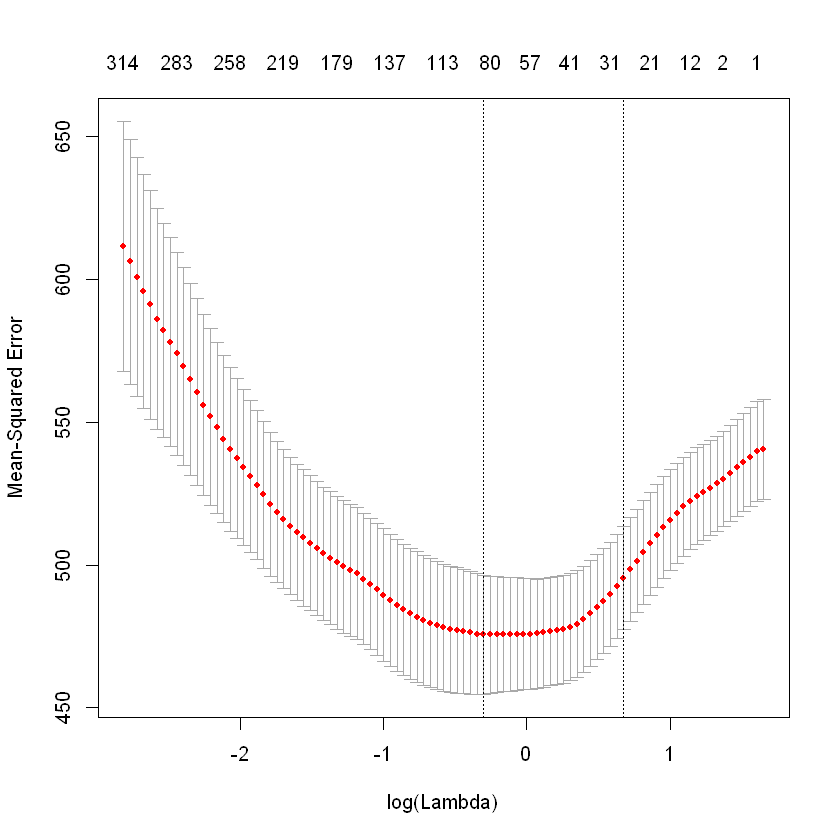

In [5]:
#Finding best lambda value through cross-validation
L2.cv <- cv.glmnet(x.full, y.full, alpha = 1, nfolds = 10)
plot(L2.cv)
lambda_best <- L2.cv$lambda.min 
lambda_best


CV the ALPHA to WIIIIIn

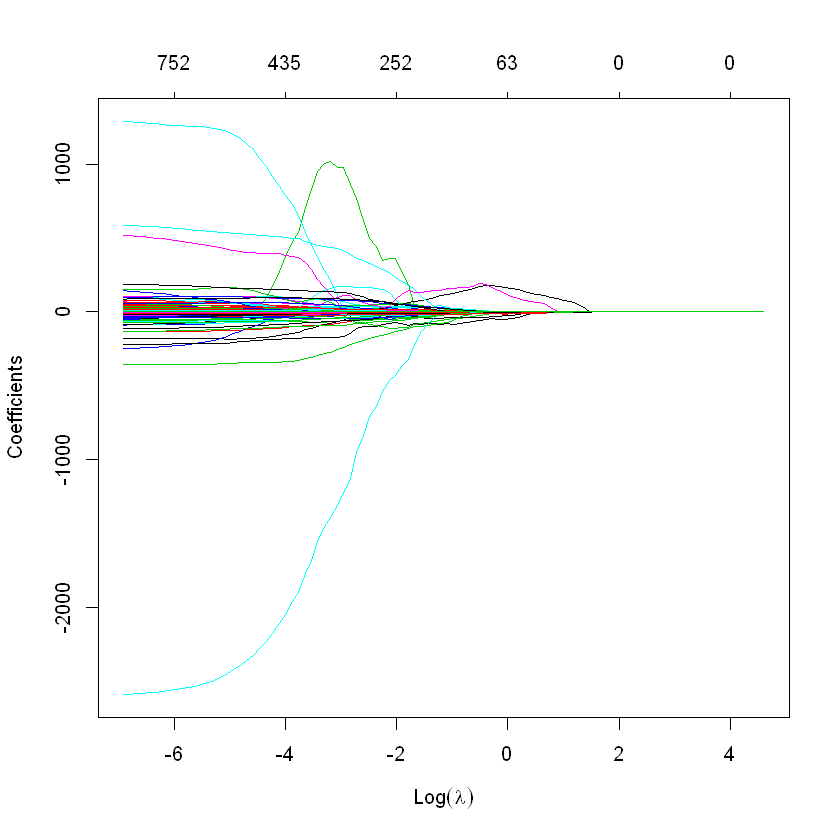

In [27]:
L2 <- glmnet(x.full, y.full, alpha = 1, lambda = 10^seq(2,-3, length = 100))
plot(L2, "lambda", xlab = parse(text = "Log(lambda)"))


Run lasso on test set

In [6]:
L2 <- glmnet(x.full, y.full, alpha = 1, lambda = lambda_best)

In [7]:
result <- predict(L2,x.test)

In [8]:
id <- 1:68
temps <- data.frame(result)
final.data <- data.frame(Id = id,VALENCE.PLEASANTNESS = temps$s0)
write.csv(final.data,"../../Submission/Lasso.csv",row.names = FALSE)